# Video Game Sales Analysis released from 1971-2024.
### Introduction
#### his dataset contains information on video game sales, covering various platforms, genres, and regional sales figures. It also includes critic and user scores, which can help us understand the correlation between ratings and sales performance.
#### The goal is to analyze key patterns within the data, identify trends in sales across genres and platforms, and assess the impact of critic and user ratings on game sales.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("vgchartz-2024.csv")


### Data Loading and Initial Exploration

In [2]:
data.head(10)

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
5,/games/boxart/full_call-of-duty-modern-warfare...,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.7,14.82,9.07,0.13,4.29,1.33,2011-11-08,NaN
6,/games/boxart/full_call-of-duty-black-ops_5Ame...,Call of Duty: Black Ops,X360,Shooter,Activision,Treyarch,8.8,14.74,9.76,0.11,3.73,1.14,2010-11-09,NaN
7,/games/boxart/full_4653215AmericaFrontccc.jpg,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13.94,5.26,0.21,6.21,2.26,2018-10-26,2018-11-02
8,/games/boxart/full_1977964AmericaFrontccc.jpg,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,13.86,8.27,0.07,4.32,1.20,2012-11-13,2018-04-07
9,/games/boxart/full_4649679AmericaFrontccc.png,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.0,13.80,4.99,0.65,5.88,2.28,2012-11-13,2018-04-07


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


## Data Cleaning Process

In [4]:
data.isnull().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

### Handling Missing Values

In [5]:
data["critic_score"].fillna(data['critic_score'].mean(),inplace=True)

C:\Users\sonu\AppData\Local\Temp\ipykernel_6552\3963052187.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["critic_score"].fillna(data['critic_score'].mean(),inplace=True)


In [6]:
data["total_sales"].fillna(data['total_sales'].mean(),inplace=True)

C:\Users\sonu\AppData\Local\Temp\ipykernel_6552\1014438998.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["total_sales"].fillna(data['total_sales'].mean(),inplace=True)


In [7]:
data["na_sales"].fillna(data['na_sales'].mean(),inplace=True)

C:\Users\sonu\AppData\Local\Temp\ipykernel_6552\3287677360.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["na_sales"].fillna(data['na_sales'].mean(),inplace=True)


In [8]:
data["jp_sales"].fillna(data['jp_sales'].mean(),inplace=True)

C:\Users\sonu\AppData\Local\Temp\ipykernel_6552\2911149903.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["jp_sales"].fillna(data['jp_sales'].mean(),inplace=True)


In [9]:
data["pal_sales"].fillna(data['pal_sales'].mean(),inplace=True)

C:\Users\sonu\AppData\Local\Temp\ipykernel_6552\434176284.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["pal_sales"].fillna(data['pal_sales'].mean(),inplace=True)


In [10]:
data["other_sales"].fillna(data['other_sales'].mean(),inplace=True)

C:\Users\sonu\AppData\Local\Temp\ipykernel_6552\3674932781.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["other_sales"].fillna(data['other_sales'].mean(),inplace=True)


In [11]:
data.dropna(subset=["developer"], inplace=True)

In [12]:
data["release_date"]=pd.to_datetime(data["release_date"])

In [13]:
data["last_update"]=pd.to_datetime(data["last_update"])

In [14]:
data['release_date'].fillna(method='ffill',inplace=True)

C:\Users\sonu\AppData\Local\Temp\ipykernel_6552\2957259368.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['release_date'].fillna(method='ffill',inplace=True)
C:\Users\sonu\AppData\Local\Temp\ipykernel_6552\2957259368.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['release_date'].fillna(method='ffill',inplace=True)


In [15]:
data['last_update'].fillna(method='ffill',inplace=True)

C:\Users\sonu\AppData\Local\Temp\ipykernel_6552\1291545248.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['last_update'].fillna(method='ffill',inplace=True)
C:\Users\sonu\AppData\Local\Temp\ipykernel_6552\1291545248.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['last_update'].fillna(method='ffill',inplace=True)


In [16]:
data.dropna(subset=["last_update"],inplace=True)

In [17]:
data.duplicated().sum()

np.int64(0)

In [18]:
data.head(5)

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.70000,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.60000,16.15,8.41,0.47,5.49,1.78,2002-10-28,2018-01-03
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,7.22044,15.86,9.06,0.06,5.33,1.42,2013-09-17,2018-01-03
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.10000,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
5,/games/boxart/full_call-of-duty-modern-warfare...,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.70000,14.82,9.07,0.13,4.29,1.33,2011-11-08,2018-01-14


### convert data types object to datetime

In [19]:
data["year"]=data["release_date"].dt.year

# Descriptive Statistics and Basic Analysis

### Calculate Region Sales_Share 

In [20]:
data["Northamerica_share %"]=round((data["na_sales"]/data["total_sales"])*100,2) 

In [21]:
data["Japan_share %"]=round((data["jp_sales"]/data["total_sales"])*100,2) 

In [22]:
data["Urope_share %"]=round((data["pal_sales"]/data["total_sales"])*100,2) 

In [23]:
data["Restworld_share %"]=round((data["other_sales"]/data["total_sales"])*100,2) 

## Total Sales

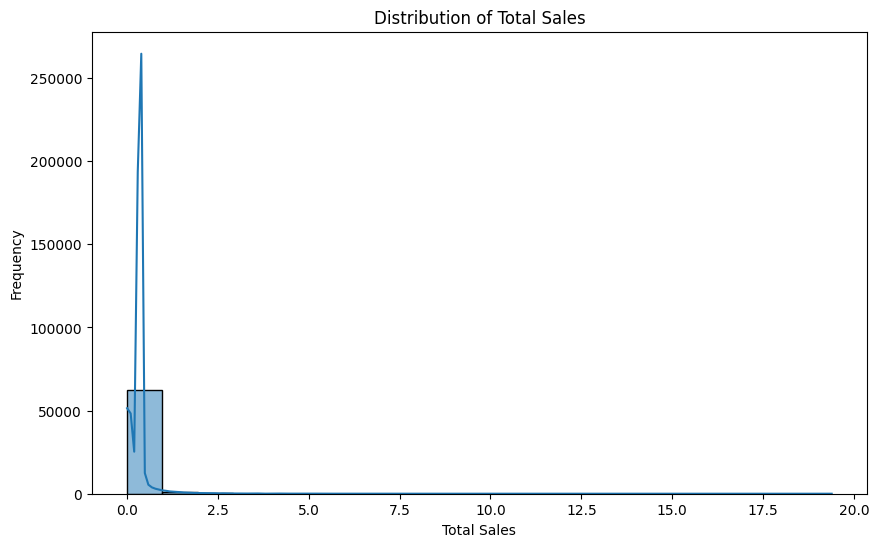

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data['total_sales'], bins=20, kde=True)  # kde=True adds a smooth curve over the histogram
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

## Average Total Sales

In [25]:
platform_sales=data.groupby("console")["total_sales"].mean().sort_values(ascending=False)
print(platform_sales)

console
X360    0.582683
GBC     0.554904
PS3     0.532477
PS2     0.429210
PS4     0.426571
          ...   
3DS     0.267794
GC      0.251373
DS      0.234129
PSP     0.225969
PSV     0.191306
Name: total_sales, Length: 81, dtype: float64


In [26]:
platform_sales.isnull().sum()

np.int64(0)

C:\Users\sonu\AppData\Local\Temp\ipykernel_6552\3435665360.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_sales.index, y=platform_sales.values, palette="viridis")


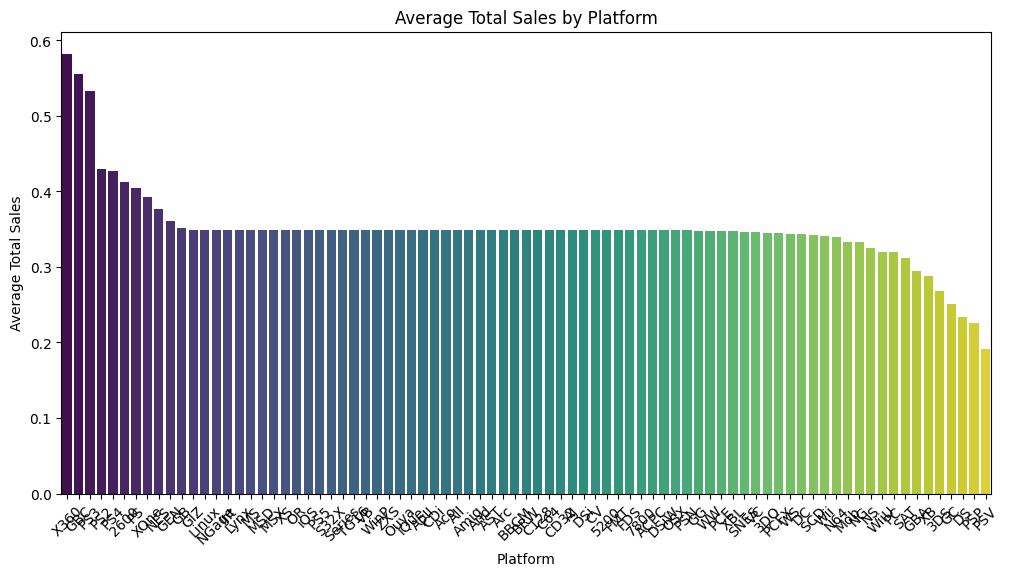

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(x=platform_sales.index, y=platform_sales.values, palette="viridis")
plt.title("Average Total Sales by Platform")
plt.xlabel("Platform")
plt.ylabel("Average Total Sales")
plt.xticks(rotation=45)
plt.show()

### Average Total Sales by Generation

In [27]:
def extract(val):
    return val[0:3]


data['short_gen']=data["genre"].map(extract)


In [28]:
generation_sales=data.groupby("short_gen")["total_sales"].mean().sort_values(ascending=False)
print(generation_sales)

short_gen
Sho    0.437409
San    0.426157
Spo    0.399393
Act    0.365518
Fig    0.364773
Rac    0.356753
Pla    0.353399
Mus    0.350562
MMO    0.338996
Edu    0.336928
Mis    0.333924
Rol    0.332724
Boa    0.327375
Par    0.323190
Sim    0.320390
Puz    0.313555
Str    0.303578
Adv    0.295504
Vis    0.206462
Name: total_sales, dtype: float64


In [29]:
generation_sales.isnull().sum()

np.int64(0)

C:\Users\sonu\AppData\Local\Temp\ipykernel_6552\2098072281.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=generation_sales.index,y=generation_sales.values,palette="viridis")


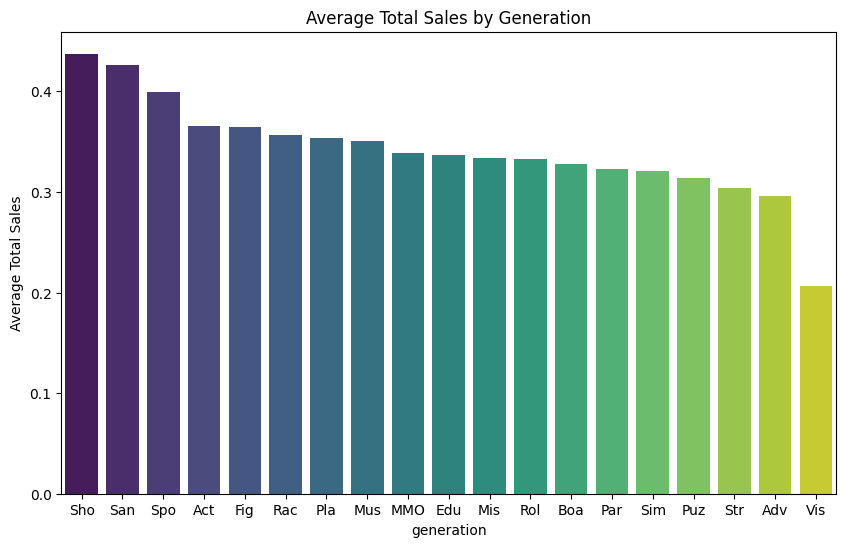

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x=generation_sales.index,y=generation_sales.values,palette="viridis")
plt.title("Average Total Sales by Generation")
plt.xlabel("generation")
plt.ylabel("Average Total Sales")
plt.show()

### Total Sales by Generation

In [32]:
genre_sales = round(data.groupby('genre')['total_sales'].sum().reset_index(),2)

In [33]:
genre_sales = genre_sales.sort_values(by='total_sales', ascending=False)


In [34]:
genre_sales

,genre,total_sales
7,Misc,3105.82
0,Action,3101.45
15,Shooter,2365.07
17,Sports,2231.01
13,Role-Playing,1902.85
2,Adventure,1849.27
10,Platform,1413.59
12,Racing,1221.88
18,Strategy,1118.08
11,Puzzle,1103.40


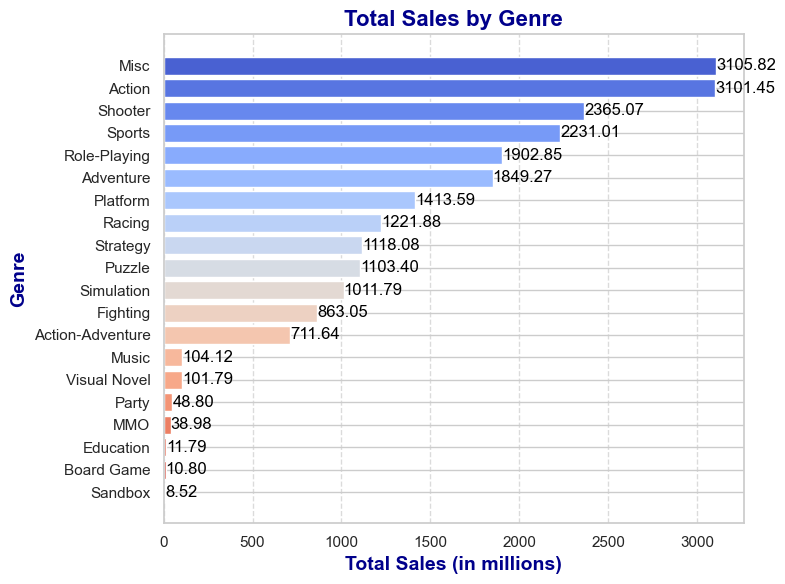

In [35]:
sns.set(style="whitegrid")

# Create a figure with a bigger size
plt.figure(figsize=(8, 6))

# Create the horizontal bar chart with color gradients
bars = plt.barh(genre_sales['genre'], genre_sales['total_sales'], color=sns.color_palette("coolwarm", len(genre_sales)))

# Add titles and labels
plt.xlabel('Total Sales (in millions)', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Genre', fontsize=14, fontweight='bold', color='darkblue')
plt.title('Total Sales by Genre', fontsize=16, fontweight='bold', color='darkblue')

# Invert y-axis for better viewing (highest sales at the top)
plt.gca().invert_yaxis()

# Add annotations to each bar for better clarity
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.3, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center', fontsize=12, color='black')

# Customize gridlines and background for a cleaner look
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [36]:
data.head(3)

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,year,Northamerica_share %,Japan_share %,Urope_share %,Restworld_share %,short_gen
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.70000,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03,2014,31.25,3.09,50.08,15.58,Act
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.60000,16.15,8.41,0.47,5.49,1.78,2002-10-28,2018-01-03,2002,52.07,2.91,33.99,11.02,Act
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,7.22044,15.86,9.06,0.06,5.33,1.42,2013-09-17,2018-01-03,2013,57.12,0.38,33.61,8.95,Act


### Number of Games Released by Developers

In [37]:
developer_game_count = data['developer'].value_counts()

In [38]:
top_developers = developer_game_count.head(10)

In [39]:
data['developer'] = data['developer'].replace('Unknown', 'Rockstar North')

In [40]:
top_developers

developer
Unknown            4435
Konami              976
Sega                915
Capcom              870
Namco               489
Square Enix         425
SNK Corporation     408
EA Canada           396
Hudson Soft         394
Ubisoft             377
Name: count, dtype: int64

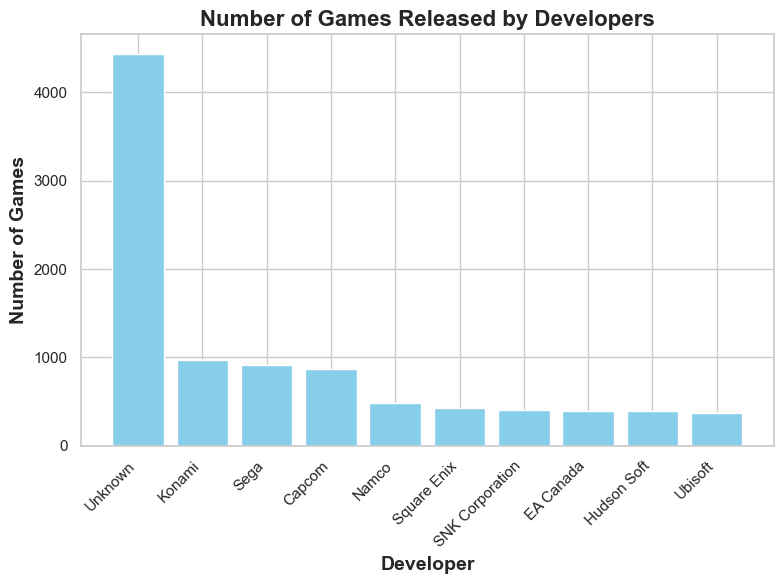

In [41]:
developers = top_developers.index
game_counts = top_developers.values

# Create a bar chart
plt.figure(figsize=(8, 6))

# Plotting the bar chart
plt.bar(developers, game_counts, color='skyblue')

# Adding title and labels
plt.title('Number of Games Released by Developers', fontsize=16, fontweight='bold')
plt.xlabel('Developer', fontsize=14, fontweight='bold')
plt.ylabel('Number of Games', fontsize=14, fontweight='bold')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the bar chart
plt.tight_layout()
plt.show()

## Top 10 Publishers by Number of Games Released

In [42]:
publisher_game_count = data['publisher'].value_counts()
top_publisher = publisher_game_count.head(10).sort_values(ascending=True)
data['publisher'] = data['publisher'].replace('Unknown', 'Rockstar Games')
top_publisher

publisher
THQ                            1111
Microsoft                      1272
Sony Computer Entertainment    1372
Nintendo                       1476
Konami                         1544
Activision                     1582
Electronic Arts                1619
Ubisoft                        1662
Sega                           2207
Unknown                        8833
Name: count, dtype: int64

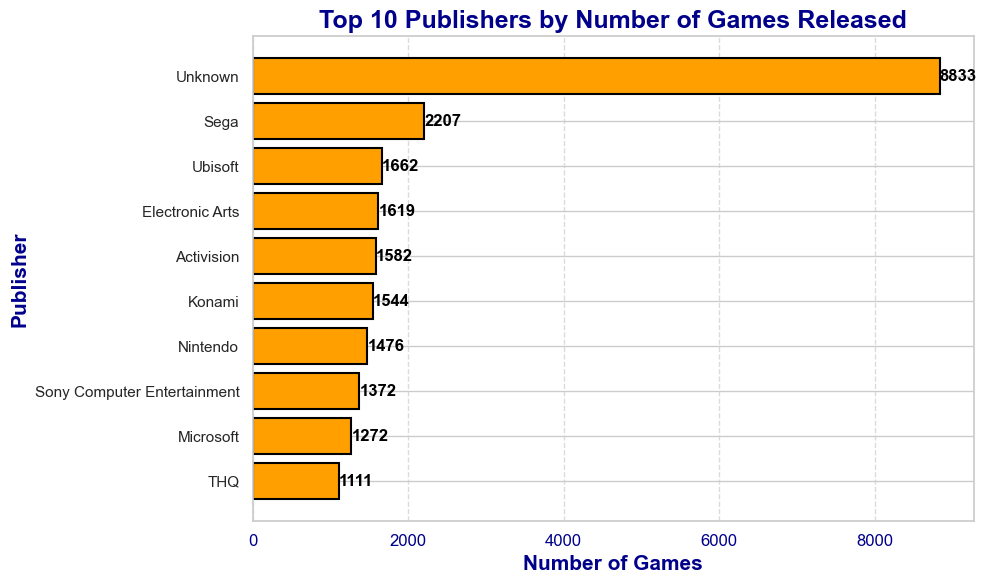

In [43]:
plt.figure(figsize=(10, 6))

# Set the bar colors and edges to make the chart visually appealing
bars = plt.barh(top_publisher.index, top_publisher.values, color='#FF9F00', edgecolor='black', linewidth=1.5)

# Add title and labels with professional font styling
plt.title('Top 10 Publishers by Number of Games Released', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Number of Games', fontsize=15, fontweight='bold', color='darkblue')
plt.ylabel('Publisher', fontsize=15, fontweight='bold', color='darkblue')

# Add value labels at the end of each bar for better readability
for bar in bars:
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2, 
             f'{int(bar.get_width())}', va='center', fontsize=12, fontweight='bold', color='black')

# Customize the x-axis ticks for readability and make them larger
plt.xticks(fontsize=12, fontweight='light', color='darkblue')

# Add gridlines for better readability of the bar lengths
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Tight layout to ensure the chart is clean and neatly spaced
plt.tight_layout()

# Show the chart
plt.show()


## Total Sales by Region on Wolrd Map

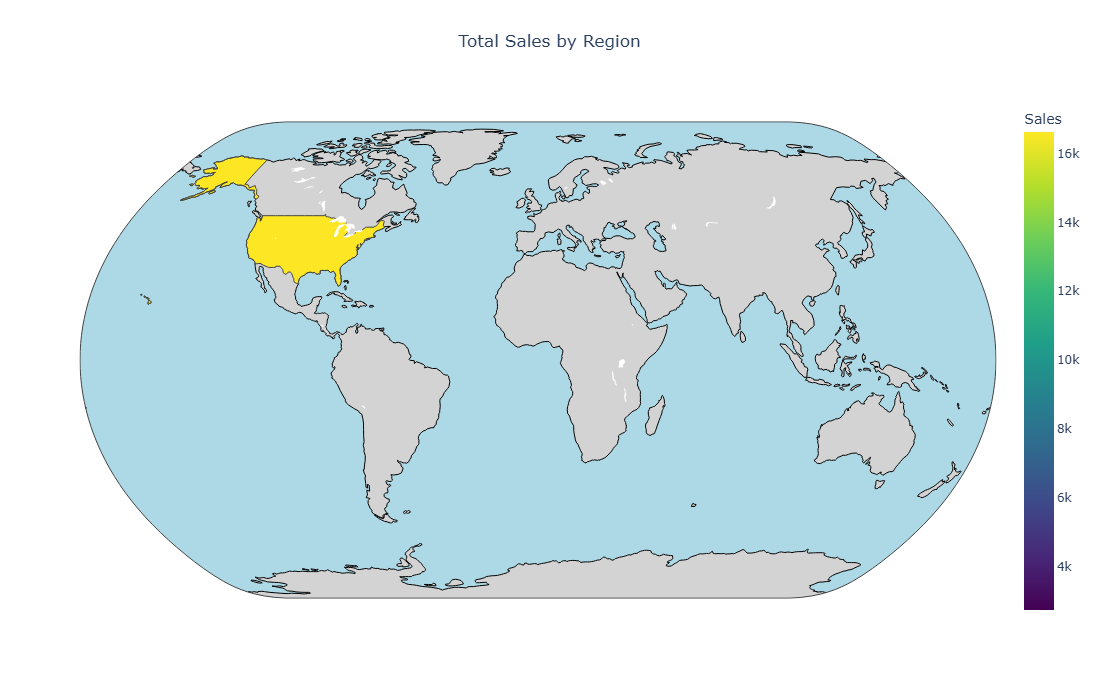

In [64]:

import plotly.express as px


# Calculate the sales for each region
data['North_America_Sales'] = data['total_sales'] * data['Northamerica_share %'] / 100
data['Japan_Sales'] = data['total_sales'] * data['Japan_share %'] / 100
data['Europe_Sales'] = data['total_sales'] * data['Urope_share %'] / 100
data['Other_Sales'] = data['total_sales'] * data['Restworld_share %'] / 100

# Aggregating the sales by region
region_sales = {
    'Region': ['North America', 'Japan', 'Europe', 'Other'],
    'Sales': [
        data['North_America_Sales'].sum(),
        data['Japan_Sales'].sum(),
        data['Europe_Sales'].sum(),
        data['Other_Sales'].sum()
    ]
}

region_df = pd.DataFrame(region_sales)

# Manually define locations to map your custom regions to geographic regions
region_df['Location'] = region_df['Region'].map({
    'North America': 'USA',  # Using USA to represent North America
    'Japan': 'Japan',        # Japan is itself
    'Europe': 'Germany',     # Using Germany as a representative European country
    'Other': 'Australia'     # Using Australia for Other/Rest of World
})

# Creating the geo chart using Plotly Express
fig = px.choropleth(region_df,
                    locations='Location',  # Specifying the location (USA, Japan, Germany, Australia)
                    color='Sales',  # Color by sales values
                    hover_name='Region',  # Show region names on hover
                    color_continuous_scale='Viridis',  # Color scale
                    projection="natural earth",  # Using a natural earth projection for better region display
                    title='Total Sales by Region')  # Chart title

# Update layout for a square-like aspect ratio
fig.update_geos(
    projection_type="natural earth",  # Choose projection type
    visible=True,
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="Lightgray",
    showocean=True,
    oceancolor="lightblue"
)

# Make the plot a square shape
fig.update_layout(
    autosize=False,
    width=1000,  # Set a specific width
    height=700,  # Set a specific height to create a square
    title_x=0.5,  # Position the title at the center
    title_y=0.95  # Position the title at the top center
)

# Show the chart
fig.show()


# Top 10 Games by Unique Critic Scores since 1971

In [45]:
sorted_data = data.sort_values(by='critic_score', ascending=False)
unique_ratings = sorted_data.drop_duplicates(subset='critic_score').head(10)
print(unique_ratings[['title', 'critic_score']])

                                                   title  critic_score
29250            The Legend of Zelda: Breath of the Wild          10.0
39846                                Super Mario Odyssey           9.9
357    Rockstar Games Double Pack: Grand Theft Auto I...           9.8
39898                           Super Mario Bros. Deluxe           9.7
486                                             Portal 2           9.6
19076                                        Bayonetta 2           9.5
54015                                              Quake           9.4
1650                                Xenoblade Chronicles           9.3
2814                            Tony Hawk's Pro Skater 4           9.2
2479                                              NHL 10           9.1


In [46]:
fig = px.bar(unique_ratings,
             x='title',
             y='critic_score',
             title='Top 10 Games by Unique Critic Scores',
             labels={'title': 'Game Title', 'critic_score': 'Critic Score'},
             color='critic_score',  # Color by critic score for visual emphasis
             text='critic_score')   # Display the score on the bars

# Show the chart
fig.show()

## Top 10 Most Saled Game by Generation

In [47]:
platform_genre_sales = round(data.groupby(['console', 'genre'])['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False).head(10),2)
platform_genre_sales

,console,genre,total_sales
456,PC,Adventure,579.43
472,PC,Strategy,491.94
461,PC,Misc,466.62
467,PC,Role-Playing,421.05
454,PC,Action,406.43
469,PC,Shooter,378.44
470,PC,Simulation,324.95
526,PS2,Sports,320.84
788,X360,Shooter,251.60
116,And,Misc,238.09


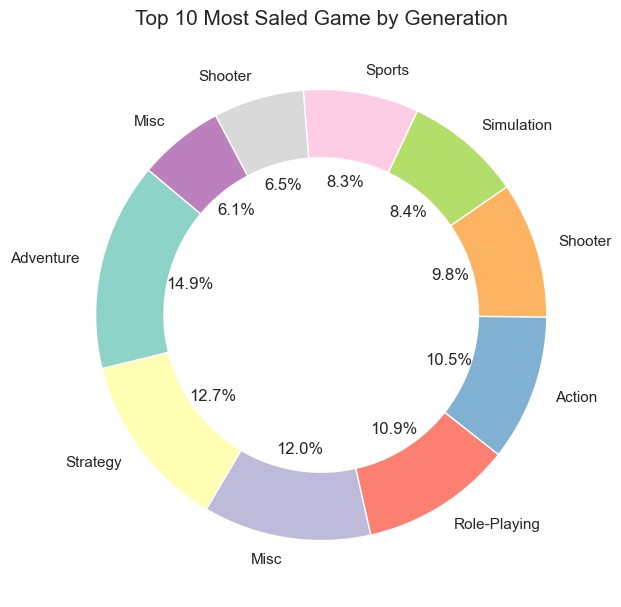

In [54]:
sns.set(style="whitegrid")

# Create a pie chart with a hole in the center (Donut chart)
plt.figure(figsize=(8, 6))
plt.pie(platform_genre_sales['total_sales'], 
        labels=platform_genre_sales['genre'], 
        autopct='%1.1f%%',  # Percentage format
        startangle=140,  # Start angle for the first segment
        colors=sns.color_palette("Set3", len(platform_genre_sales)))  # Color palette from Seaborn

# Draw a white circle at the center to create the donut effect
centre_circle = plt.Circle((0,0), 0.70, color='white', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

# Set the title of the chart
plt.title("Top 10 Most Saled Game by Generation", fontsize=15)

# Show the chart
plt.show()

## Impact of Critic Scores on Sales by Region

In [49]:
region_data = data[['title', 'critic_score', 'North_America_Sales', 'Japan_Sales', 'Europe_Sales', 'Other_Sales']]

region_data_melted = pd.melt(region_data, 
                             id_vars=['title', 'critic_score'], 
                             value_vars=['North_America_Sales', 'Japan_Sales', 'Europe_Sales', 'Other_Sales'],
                             var_name='Region', 
                             value_name='Sales')



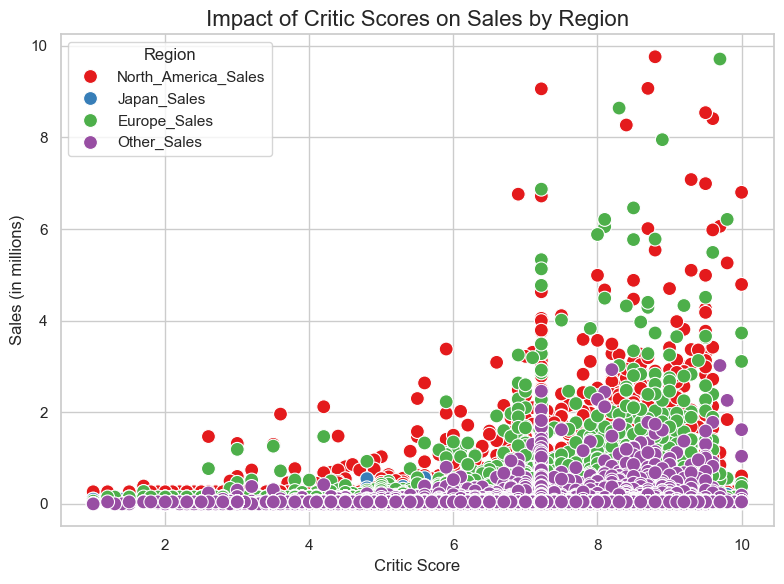

In [50]:

sns.set(style="whitegrid")


plt.figure(figsize=(8, 6))
sns.scatterplot(x='critic_score', y='Sales', hue='Region', data=region_data_melted, palette='Set1', s=100)

# Add titles and labels
plt.title('Impact of Critic Scores on Sales by Region', fontsize=16)
plt.xlabel('Critic Score', fontsize=12)
plt.ylabel('Sales (in millions)', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

## Global Sales Distribution by Generation

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


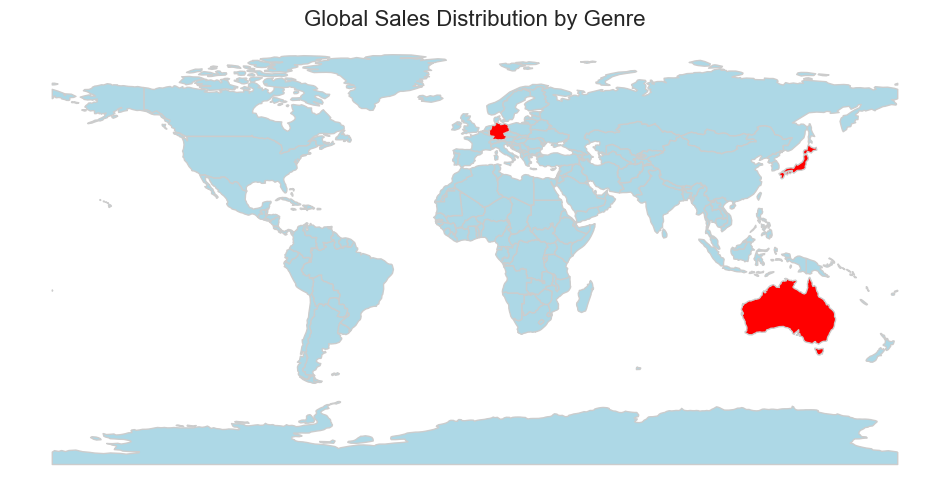

In [62]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the world map data
world = gpd.read_file("C:/Users/sonu/Downloads/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

# Verify available columns in the world data for mapping
print(world.columns)  # Look for the actual country name column, e.g., 'ADMIN' or similar

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# List of countries to highlight based on sales data
highlighted_countries = ["United States", "Japan", "Germany", "Australia"]

# Assuming the country name column is `ADMIN`
world['highlight'] = world['ADMIN'].isin(highlighted_countries)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot all regions in light blue
world[~world['highlight']].plot(ax=ax, color='lightblue', edgecolor='0.8')

# Plot highlighted regions in red
world[world['highlight']].plot(ax=ax, color='red', edgecolor='0.8', linewidth=1)

# Customize plot appearance
ax.set_title("Global Sales Distribution by Genre", fontsize=16)
ax.set_axis_off()

# Show the plot
plt.show()
